# **Simple Sentiment Analysis on IMDB Reviews**

## **Import Library**

In [55]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow version: ', tf.__version__)
print('TensorFlow Datasets version: ', tfds.__version__)
print('NumPy version: ', np.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

TensorFlow version:  2.5.0
TensorFlow Datasets version:  4.0.1
NumPy version:  1.19.5


## **Import IMDB Reviews Dataset**

In [56]:
imdb_data, imdb_info = tfds.load('imdb_reviews', as_supervised=True, with_info=True)

## **A Glimpse IMDB Reviews Dataset**

In [57]:
imdb_data

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [58]:
imdb_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

## **Preparing Training and Testing Data**

In [59]:
training_data, testing_data = imdb_data['train'], imdb_data['test']

In [60]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for sentence, label in training_data:
  training_sentences.append(str(sentence.numpy()))
  training_labels.append(label.numpy())

for sentence, label in testing_data:
  testing_sentences.append(str(sentence.numpy()))
  testing_labels.append(label.numpy())

In [61]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## **Tokenization**

In [62]:
'''
Tokenizer specification
'''

vocabulary_size = 10000
oov_string = '<OOV>'
embedding_dimension = 16
max_length = 120
trunc_type = 'post'

In [63]:
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token=oov_string)
tokenizer.fit_on_texts(training_sentences)

In [64]:
word_index = tokenizer.word_index

In [65]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [66]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

In [67]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [68]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

## **Building Model**

In [69]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabulary_size, embedding_dimension, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                30736     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 190,753
Trainable params: 190,753
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
number_of_epochs = 10

model_history = model.fit(training_padded, 
                training_labels_final, 
                epochs=number_of_epochs,
                validation_data=(testing_padded, testing_labels_final))
model_history

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4750 - accuracy: 0.7587 - val_loss: 0.3537 - val_accuracy: 0.8435
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2219 - accuracy: 0.9165 - val_loss: 0.3899 - val_accuracy: 0.8311
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0644 - accuracy: 0.9846 - val_loss: 0.5135 - val_accuracy: 0.8153
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0114 - accuracy: 0.9989 - val_loss: 0.5960 - val_accuracy: 0.8231
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.6567 - val_accuracy: 0.8247
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 8.3252e-04 - accuracy: 1.0000 - val_loss: 0.7036 - val_accuracy: 0.8257
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 5.5621e-04 - accuracy: 1.0000 - val_loss: 0.7494 - val_accuracy: 0.827

In [72]:
def plot_model_graph(list_data, list_labels, title):
  plt.figure(figsize=(8,4))
  for x in range(len(list_data)):
    plt.plot(model_history.history[list_data[x]], label=list_labels[x])
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(list_labels, loc='upper left')
  plt.title(title)
  plt.show()

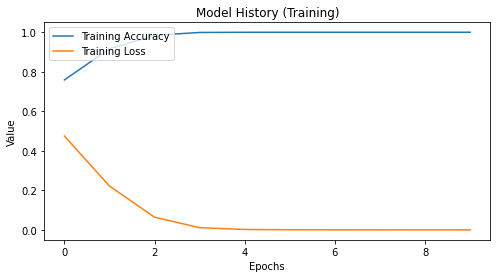

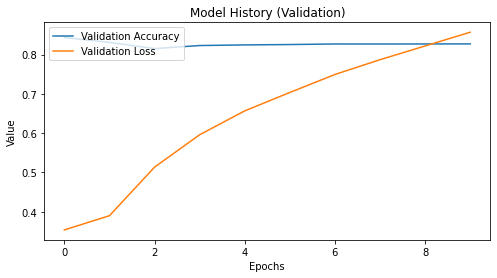

In [73]:
list_data_train = ['accuracy', 'loss']
list_labels_train = ['Training Accuracy', 'Training Loss']

list_data_val = ['val_accuracy', 'val_loss']
list_labels_val = ['Validation Accuracy', 'Validation Loss']

plot_model_graph(list_data_train, list_labels_train, 'Model History (Training)')
plot_model_graph(list_data_val, list_labels_val, 'Model History (Validation)')